# Part 1

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def newton_diff(xs, ys):
    assert len(xs) == len(ys)
    n = len(xs)
    if (n == 1):
        return ys[0]
    elif (n == 2):
        return (ys[1] - ys[0]) / (xs[1] - xs[0])
    x0 = xs[0]
    xn = xs[-1]
    return (newton_diff(xs[1:], ys[1:]) - newton_diff(xs[0:-1], ys[0:-1])) / (xn - x0)

def newton_interpolation(xs, ys):
    current_poly = np.array([1.0])
    result_poly = np.array([0.0])
    for n, x in enumerate(xs):
        result_poly = np.polyadd(result_poly, newton_diff(xs[0:n+1], ys[0:n+1]) * current_poly)
        multiple_poly = np.array([1.0, -x])
        current_poly = np.polymul(current_poly, multiple_poly)
    return result_poly

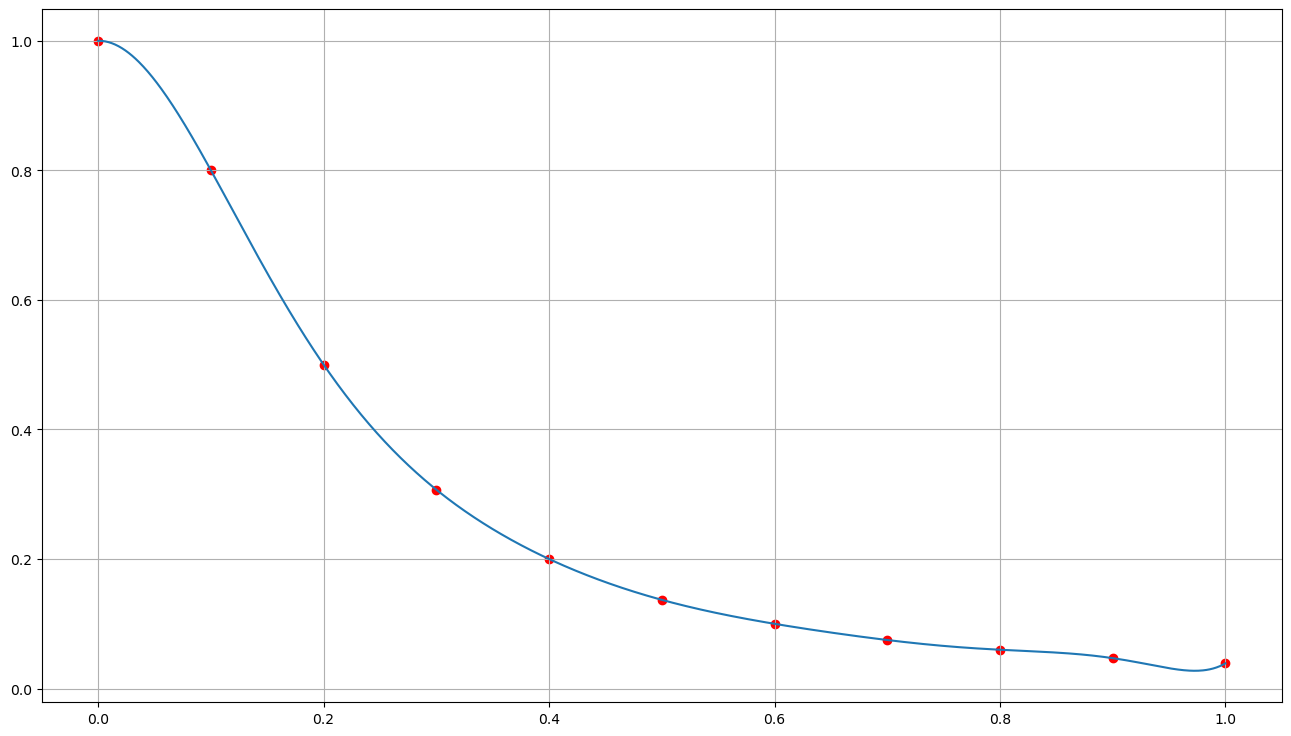

In [8]:
xs = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ys = np.array([1.0, 0.8, 0.5, 0.307, 0.2, 0.137, 0.1, 0.075, 0.06, 0.047, 0.039])
poly_x_t = newton_interpolation(xs, ys)

xs_lin = np.linspace(min(xs), max(xs), 1000)
plt.figure(figsize=[16, 9])
plt.scatter(xs, ys, color="red")
plt.grid()
plt.plot(xs_lin, np.polyval(poly_x_t, xs_lin))
plt.savefig("part1.pdf")

# Part 2

In [4]:
def get_l_k(xs, k):
    poly = np.array([1.0])
    div = 1.0
    for n, x in enumerate(xs):
        if n == k:
            continue
        poly = np.polymul(poly, np.array([1.0, -x]))
        div *= (xs[k] - xs[n])
    poly /= div
    return poly

def get_langrange_poly(xs: np.array, ys: np.array) -> np.array:
    result = np.array([0.0])
    for n, y in enumerate(ys):
        result = np.polyadd(result, get_l_k(xs, n) * y) 
    return result

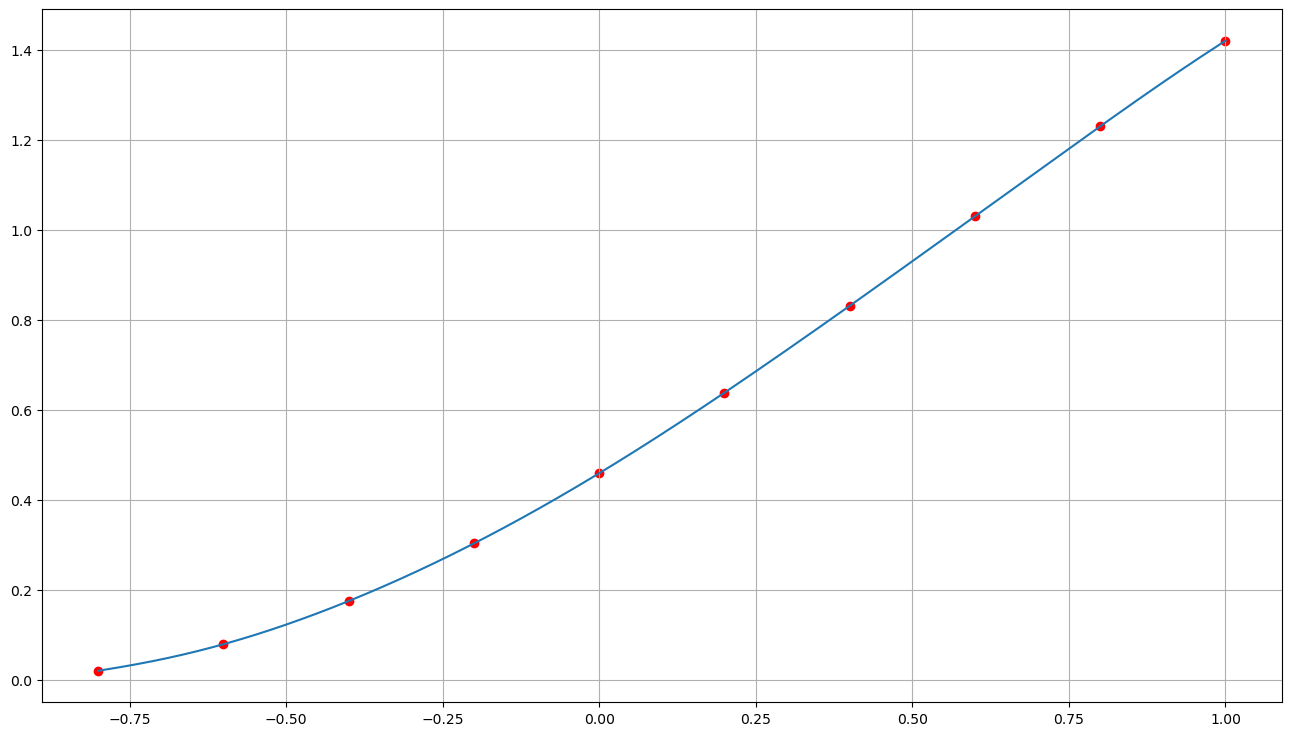

In [7]:
xs = np.array([-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ys = np.array([0.02, 0.079, 0.175, 0.303, 0.459, 0.638, 0.831, 1.03, 1.23, 1.42])
poly_y_t = get_langrange_poly(xs, ys)

xs_lin = np.linspace(min(xs), max(xs), 1000)
plt.figure(figsize=[16, 9])
plt.scatter(xs, ys, color="red")
plt.grid()
plt.plot(xs_lin, np.polyval(poly_y_t, xs_lin))
plt.savefig("part2.pdf")

# Part 3

In [6]:
x = 0.431
y = np.polyval(poly_y_t, x)
y_der = np.polyval(np.polyder(poly_y_t), x)
print(f'y({x}) = {y}')
print(f'y\'({x}) = {y_der}')

y(0.431) = 0.8615936304910764
y'(0.431) = 0.9888406990776281
